In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#load dataset csv
dataset = pd.read_csv('C:/Users/ksmin/data_Science/dataset/Week11_DataScience-PHW_evaluation-1-datasets/linear_regression_data.csv')

print(dataset.shape)
print()
print(dataset.info()) #no missing data
print()
print(dataset.head())

(30, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Distance       30 non-null     int64
 1   Delivery Time  30 non-null     int64
dtypes: int64(2)
memory usage: 612.0 bytes
None

   Distance  Delivery Time
0       100             20
1       150             20
2       300             36
3       400             47
4       130             22


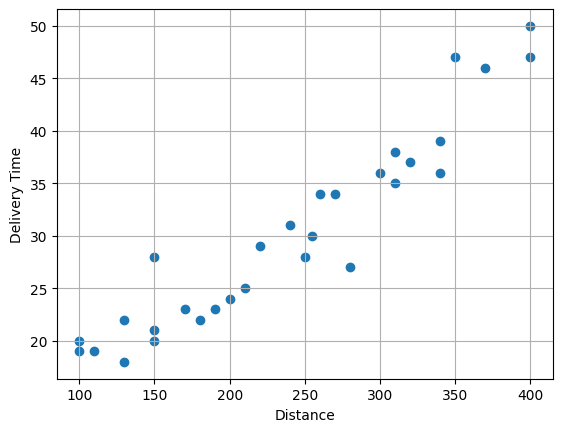

In [10]:
#Check dataset. Positive Covariance.
plt.scatter(dataset[['Distance']], dataset[['Delivery Time']])
plt.xlabel("Distance")
plt.ylabel('Delivery Time')
plt.grid()
plt.show()

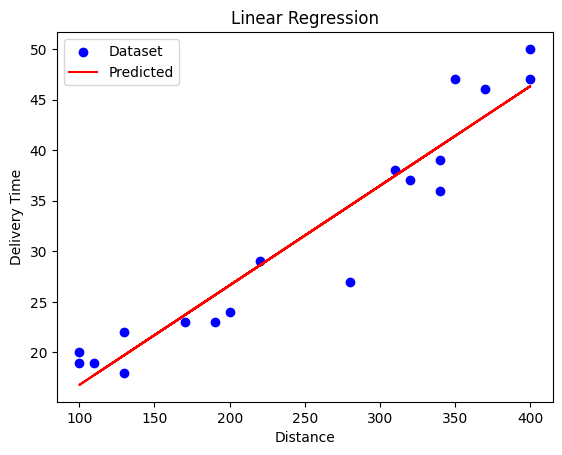

MSE: 6.878361043713396, MAE: 2.0741158973229035, R2 score: 0.7646188235991613


In [22]:
#Linear regression model, dataset split train, test by using hold-out validataion with shuffle 
#but not stratify because it is not classification problem.
def compute_linear_regression(dataset):
    X_train, X_test, y_train, y_test = train_test_split(dataset[['Distance']], dataset[['Delivery Time']], test_size=0.4, random_state=3, 
                                                        shuffle=True, stratify=None)
    model = LinearRegression()
    model.fit(X_train, y_train)

    #evaluate the model. by using MSE, MAE, R2 Squared.
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    plt.scatter(X_train, y_train, c='blue', label='Dataset')
    plt.plot(X_train, model.predict(X_train), c = 'red', label ="Predicted")
    plt.xlabel('Distance')
    plt.ylabel('Delivery Time')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

    print("MSE: {}, MAE: {}, R2 score: {}".format(mse, mae, r_squared))
compute_linear_regression(dataset)